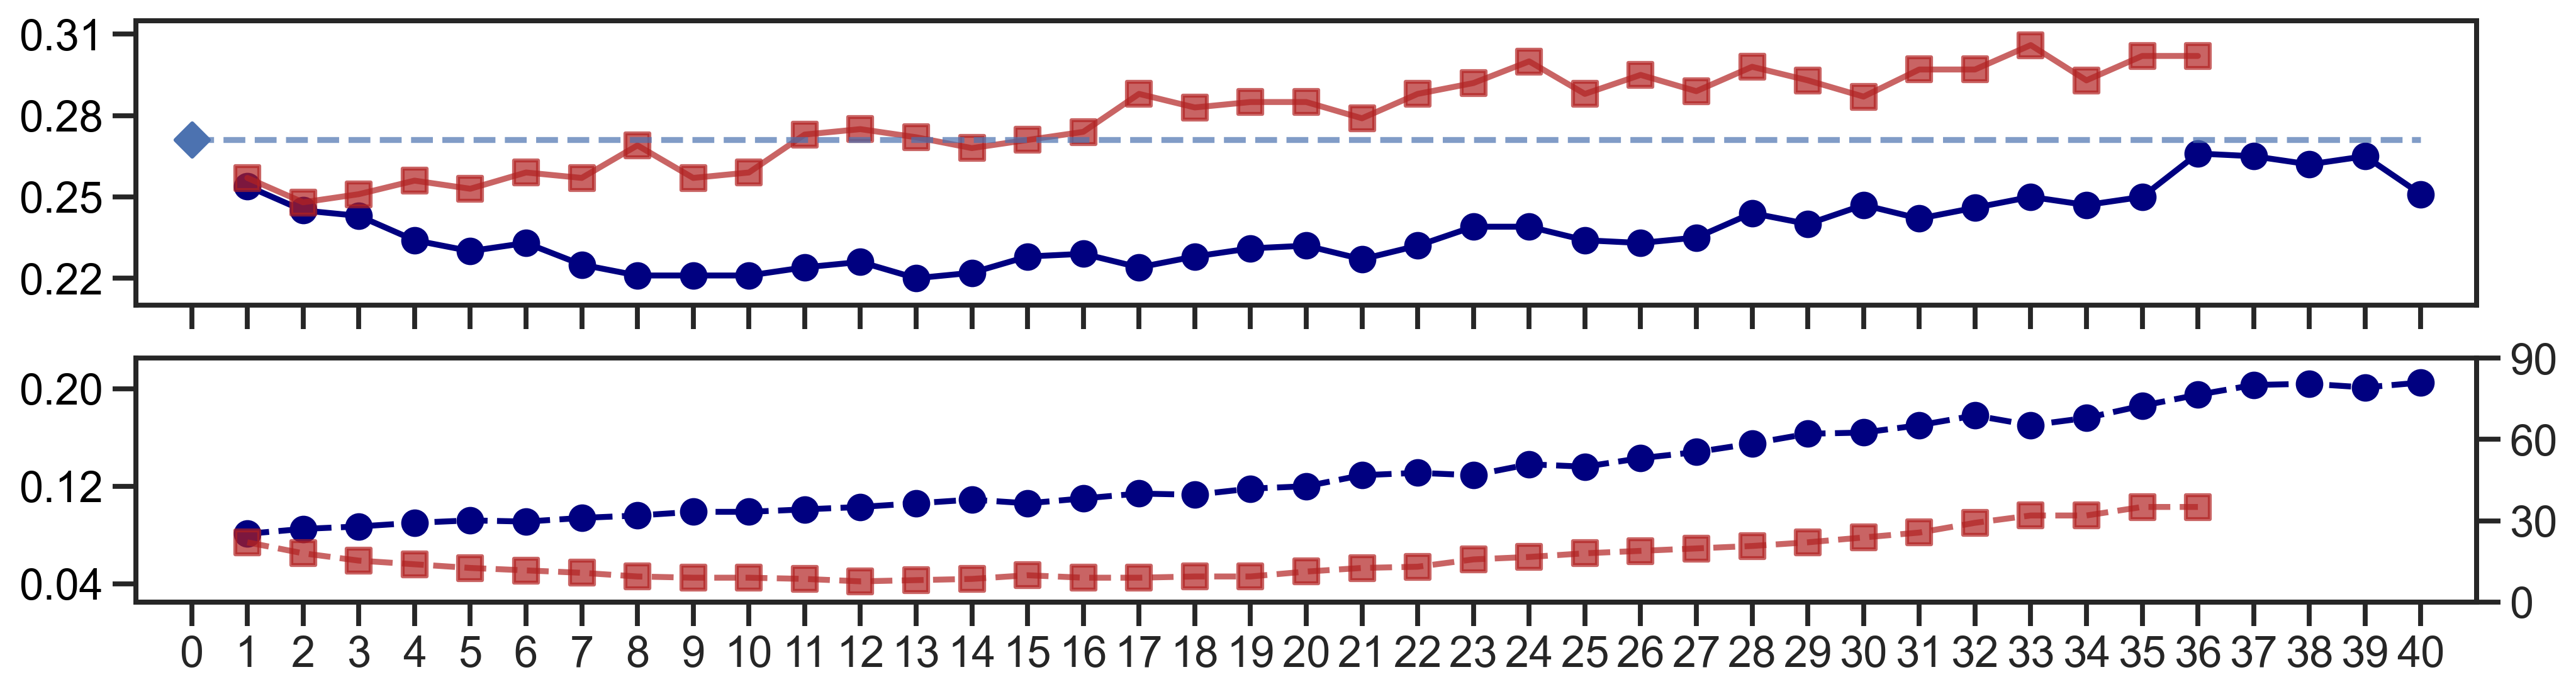

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='talk', style='ticks',
        color_codes=True, rc={'legend.frameon': False})

%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = 'Arial'
plt.rcParams.update({'font.size': 24})


x_labels = ['0'] + [str(i) for i in range(1,41)]
exp_test_mae = [np.nan,0.254,0.245,0.243,0.234,0.23,0.233,0.225,0.221,
                       0.221,0.221,0.224,0.226,0.22,0.222,0.228,0.229,0.224,0.228,
               0.231,0.232,0.227,0.232,0.239,0.239,0.234,0.233, 0.235,0.244,0.24,
               .247,.242, .246, .25, .247, .25, .266, .265, .262, .265, .251]
AugDB_test_mae = [np.nan,0.081,0.085,0.087,0.09,0.092,0.091,0.094,0.096,
                         0.099,0.099,0.101,0.103,0.106,0.109,0.106,0.110,0.114,0.113,
                 0.118, 0.12, 0.129, 0.131, 0.129, 0.138, 0.136,0.143,0.148,0.155,0.163,
                 .164, .17, .178, .17, .176, .186, .195, .203, .204, .201, .205]

aug_db_size = np.array([11638, 195070, 260903, 302463, 
                         336476, 368950, 403561, 437982, 
                         473683, 508475, 544092, 578226, 
                         609300, 639926, 669832, 696156,
                         724124, 745572, 768835, 785794,
                         805105, 820036, 835987, 848202,
                         859103, 871263, 880190, 887332, 895853, 903558, 
                         909904, 915507, 921112, 925634, 929342, 932510,
                         936174, 939454, 942687, 945648, 947897
                       ])  - 11637 - 1

Aug_DB_size = (aug_db_size) / 10000
Leftover_size = (981844 - aug_db_size) / 10000

exp_test_mae_cosmo = [np.nan,.257,.248,.251,.256,.253,.259,0.257,
                             0.269,.257,.259,.273,.275,.272,.268, .271,
                      .274, .288, .283, .285, .285, .279, .288,
                      .292,.3, .288, .295, .289, .298, .293, .287, .297, .297,
                      .306, .293, .302, .302, np.nan, np.nan, np.nan, np.nan]
AugDB_test_mae_cosmo = [np.nan,.074,.065,.059,.056,.053,.051,0.049,0.046,
                                .045,.045,.044, .042, .043, .044, .047,
                        .045, .045, .046, .046, 0.05, .053, .054,
                        .06, .062, .065, .067, .069, .071, .074, 
                        .078, .082, .09, .096, .096, .103, .103, np.nan, np.nan, 
                        np.nan, np.nan]

fig, (ax1_1,ax1_2) = plt.subplots(2,1, sharex = True, gridspec_kw={'height_ratios':[70,60]}, figsize=(16,4))

color = 'navy'
color2 = 'firebrick'


#ax1_1.set_ylabel('MAE', color = 'black')
ax1_1.plot(x_labels, exp_test_mae, color = color, zorder = 100)
ax1_1.scatter(x_labels, exp_test_mae, color = color, zorder = 100)
ax1_1.plot(x_labels, exp_test_mae_cosmo, color = color2, zorder = 100, alpha = 0.7)
ax1_1.scatter(x_labels, exp_test_mae_cosmo, marker='s', color = color2, zorder = 100, alpha = 0.7)

ax1_1.plot(x_labels, [0.271] * (len(exp_test_mae)), '--', zorder = 100, alpha = 0.7)
ax1_1.scatter(x_labels, [0.271] + [np.nan] * (len(exp_test_mae) - 1), marker = 'D')


ax1_1.tick_params(axis ='y', labelcolor = 'black')
ax1_1.set_ylim([0.21,0.315])
ax1_1.set_yticks([0.22, 0.25, 0.28, 0.31])

ax1_2.set_ylim([0.025,0.225])
ax1_2.set_yticks([0.040, 0.120, 0.200])
ax1_2.tick_params(axis ='y', labelcolor = 'black')
ax1_2.tick_params(axis ='x')

ax1_2.plot(x_labels, AugDB_test_mae, '--', color = color, zorder = 100, alpha = 1.0)
ax1_2.scatter(x_labels, AugDB_test_mae, color = color, zorder = 100, alpha = 1.0, label='Case 2')

ax1_2.plot(x_labels, AugDB_test_mae_cosmo, '--', color = color2, zorder = 100, alpha = .7)
ax1_2.scatter(x_labels, AugDB_test_mae_cosmo, marker='s', color = color2, zorder = 100, alpha = .7, label='Case 1')


ax1_1.set_xlim([-1,41])


ax2_1 = ax1_1.twinx()
ax2_2 = ax1_2.twinx()

color3 = 'black'


ax2_1.set_yticks([])
ax2_2.set_yticks([0,30,60,90])

ax2_1.spines['bottom'].set_visible(False)
ax2_2.spines['top'].set_visible(False)

plt.show()

In [3]:
import pandas as pd
df = pd.read_csv('student35.csv')

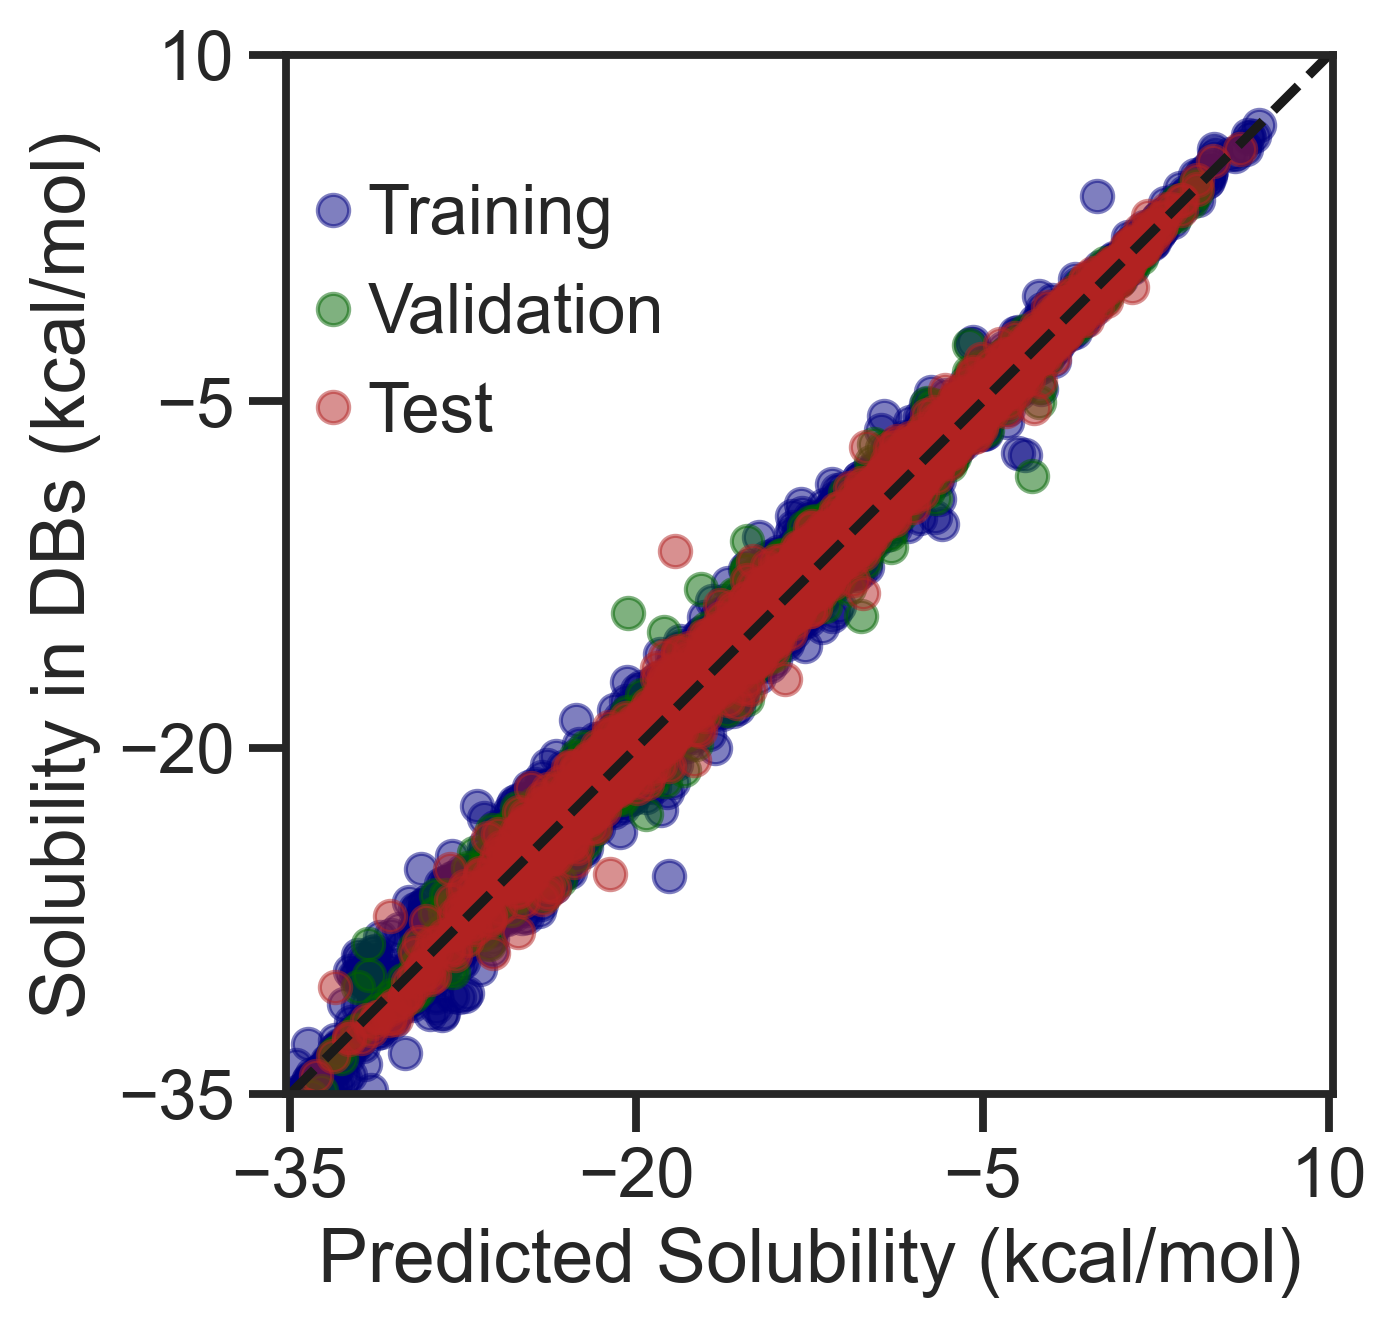

In [4]:
train_x = df[df['Train/Valid/Test'] == 'Train']['predicted']
train_y = df[df['Train/Valid/Test'] == 'Train']['DGsolv']
valid_x = df[df['Train/Valid/Test'] == 'Valid']['predicted']
valid_y = df[df['Train/Valid/Test'] == 'Valid']['DGsolv']
test_x = df[df['Train/Valid/Test'] == 'Test']['predicted']
test_y = df[df['Train/Valid/Test'] == 'Test']['DGsolv']

fig = plt.figure(figsize=(4.5,4.5))
ax = fig.add_subplot(111)
ax.axis('equal')
ax.set_xticks(np.arange(-35.0,10.01,15.0))
ax.set_yticks(np.arange(-35.0,10.01,15.0))
ax.set_xlim([-35,10])
ax.set_ylim([-35,10])
ax.set_xlabel('Predicted Solubility (kcal/mol)')
ax.set_ylabel('Solubility in DBs (kcal/mol)')

ax.plot(train_x, train_y, '.', ms=15, label='Training', alpha=0.5, color='navy')
ax.plot(valid_x, valid_y, '.',  ms=15, label='Validation', alpha=0.5, color='darkgreen')
ax.plot(test_x, test_y, '.',  ms=15, label='Test', alpha=0.5, color='firebrick')
lgnd = ax.legend(loc='center left', bbox_to_anchor=(-0.08, .75), handletextpad=-0.5)
    
ax.plot([-35,10], [-35, 10], '--', color='.1')

In [5]:
df['AE'] = np.abs(df.predicted - df.DGsolv)

print(
df[df['Train/Valid/Test'] == 'Train'].AE.mean(), 
df[df['Train/Valid/Test'] == 'Valid'].AE.mean(), 
df[df['Train/Valid/Test'] == 'Test'].AE.mean()
)

0.18155527534375537 0.18736808270805208 0.18683727237380598


In [6]:
df

,can_smiles_solute,can_smiles_solvent,DGsolv,index,Exp_or_QM,Train/Valid/Test,predicted,AE
0,O=C(c1ccccc1)C(O)c1ccccc1,O,-11.910000,20117,Exp,Train,-11.866790,0.043210
1,O=C=O,CCCCCC,-0.480000,20622,Exp,Train,-0.538849,0.058849
2,CC1CCC2(C(C)C)CC12,O,1.130000,5374,Exp,Train,1.156508,0.026508
3,Cc1cnccn1,CCCCCCCC,-4.700000,15735,Exp,Train,-4.963775,0.263775
4,CCCCCC(C)=O,Cc1ccccc1,-6.300000,7668,Exp,Train,-6.344322,0.044322
...,...,...,...,...,...,...,...,...
932504,O=C(NO)c1ccccc1[N+](=O)[O-],CCCCC(CC)CO,-12.911155,3128,QM,Test,-13.379718,0.468563
932505,CCCCCCCC=CC=CC=O,OCCS,-9.954957,3150,QM,Test,-10.061921,0.106964
932506,Fc1nc(F)c(F)c(F)c1F,CCOP(=O)(OCC)OCC,-3.936932,3153,QM,Test,-3.850314,0.086618
932507,c1cc2ccc3cc4cccc5ccc6cc(c1)c2c3c6c54,CC(Cl)Cl,-16.359772,3165,QM,Test,-16.301243,0.058529
